<a href="https://colab.research.google.com/github/megghan/python_UFSCar/blob/main/PA2_Aula_3_Algoritmos_elementares_de_ordenacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Algoritmos elementares de ordenação</font>

- Introdução
- Bubble Sort
- Selection Sort
- Insertion Sort


# Introdução

Ordenar, ou *sort* em inglês, um conjunto de elementos numéricos consiste em dispor estes elementos em ordem crescente ou em ordem decrescente. A título de convenção, vamos considerar neste texto que o objetivo principal se trata de arranjar os elementos de uma lista em ordem crescente.

Por exemplo, dada a lista ```lista_numerica``` definida na sequência, apresenta-se sua versão após o processo de ordenação definido pelo método interno ```sort()```.

In [ ]:
lista_numerica = [5,4,3,12,4,5,7,2,43,23,5,2,3,1,3]
print("Lista original: ", lista_numerica)

lista_numerica.sort()
print("Lista ordenada: ", lista_numerica)

Lista original:  [5, 4, 3, 12, 4, 5, 7, 2, 43, 23, 5, 2, 3, 1, 3]
Lista ordenada:  [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 7, 12, 23, 43]


Nesta aula, vamos discutir sobre técnicas clássicas de ordenação de listas numéricas e vamos conduzir a análise de complexidade desses métodos para determinar qual é o mais vantajoso de acordo com certas situações.

#Bubble Sort

O método de ordenação "Bolha" consiste em conduzir cada elemento em sua respectiva ordem numérica em sua lista. Assim, o processo consiste em transferir o maior elemento para a última posição da lista e, na sequência, transferir o segundo maior elemento para a penúltima posição da lista e continuar este procedimento até que todos os elementos da lista estejam em sua devida posição.

Para isso, é necessário conduzir um processo de varredura na lista que seja capaz de levar elementos maiores para a direita da lista. Especificamente, em cada varredura, os elementos são comparados dois-a-dois e, no caso do maior elemento estar à esquerda do menor, então estes têm suas posições intercambiadas na lista.

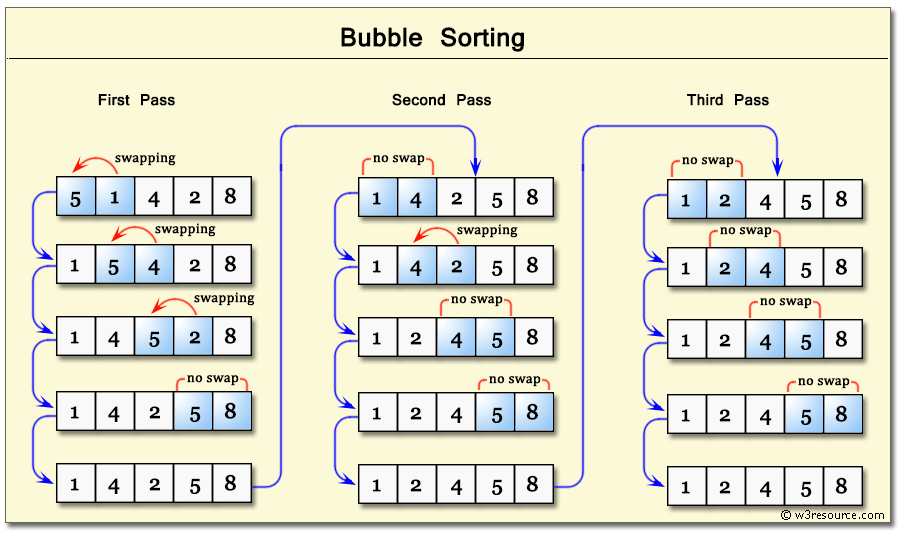



**Importante**: Suponha que a lista tenha $n$ elementos. Vale destacar que a primeira varredura deve ser conduzida de modo que todos os elementos da lista sejam avaliados. Na varredura seguinte, sabemos que o maior elemento está na última posição, então precisaremos fazer uma avaliação a menos. E assim sucessivamente.

O algoritmo é dado pela função ```bubble_sort```:

```python
def bubble_sort(L):

    n = len(L)

    for i in range(n-1):
      for j in range(n - i - 1):
        if L[j] > L[j+1]:
            aux = L[j]    
            L[j] = L[j+1]  
            L[j+1] = aux

  return L
```

Vamos analisar profundamente seu funcionamento na sequência.

In [ ]:
!pip install colorama # Caso não tenha o pacote colorama instalado no seu Colab, execute esta linha de comando

In [ ]:
import colorama
from colorama import Fore

# Funções de impressão com cores e colchetes
def print_lista_com_realce(L, i_blue = -1, i_colchetes = 0):

  msg = [str(l) for l in L]

  if i_blue != -1:
    msg[i_blue] = Fore.BLUE + str(msg[i_blue]) + Fore.BLACK

  msg.insert(i_colchetes,'[')
  msg.insert(i_colchetes+3,']')

  msg = ','.join(msg).replace('[,','[').replace(',]',']')

  print(msg)
  return msg

In [ ]:
def bubble_sort(L):

  n = len(L)

  for i in range(n-1):
    print("-------",i+1,"ª varredura -------")

    numero_de_trocas = 0

    for j in range(n - i - 1):

      if L[j] > L[j+1]:
          print_lista_com_realce(L, i_blue = j, i_colchetes = j)

          # Trocas ------------
          aux = L[j]
          L[j] = L[j+1]
          L[j+1] = aux
          # -------------------

          print_lista_com_realce(L, i_colchetes = j)
          numero_de_trocas += 1
          print("")

    # Avaliação do número de trocas:
    # Se o número de trocas for nulo, então o vetor já se encontra ordenado e
    #a estrutura de repetição não precisa continuar a ser executada.
    print("Número de trocas nesta varredura: ", numero_de_trocas)
    if numero_de_trocas == 0:
      break

  return L

In [ ]:
# Pior caso
L = [10-i for i in range(10)]
print("L original:", L, end='\n\n')
L_ordenada = bubble_sort(L)
print("\nL ordenada:", L_ordenada)

L original: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

------- 1 ª varredura -------
[10,9],8,7,6,5,4,3,2,1
[9,10],8,7,6,5,4,3,2,1

9,[10,8],7,6,5,4,3,2,1
9,[8,10],7,6,5,4,3,2,1

9,8,[10,7],6,5,4,3,2,1
9,8,[7,10],6,5,4,3,2,1

9,8,7,[10,6],5,4,3,2,1
9,8,7,[6,10],5,4,3,2,1

9,8,7,6,[10,5],4,3,2,1
9,8,7,6,[5,10],4,3,2,1

9,8,7,6,5,[10,4],3,2,1
9,8,7,6,5,[4,10],3,2,1

9,8,7,6,5,4,[10,3],2,1
9,8,7,6,5,4,[3,10],2,1

9,8,7,6,5,4,3,[10,2],1
9,8,7,6,5,4,3,[2,10],1

9,8,7,6,5,4,3,2,[10,1]
9,8,7,6,5,4,3,2,[1,10]

Número de trocas nesta varredura:  9
------- 2 ª varredura -------
[9,8],7,6,5,4,3,2,1,10
[8,9],7,6,5,4,3,2,1,10

8,[9,7],6,5,4,3,2,1,10
8,[7,9],6,5,4,3,2,1,10

8,7,[9,6],5,4,3,2,1,10
8,7,[6,9],5,4,3,2,1,10

8,7,6,[9,5],4,3,2,1,10
8,7,6,[5,9],4,3,2,1,10

8,7,6,5,[9,4],3,2,1,10
8,7,6,5,[4,9],3,2,1,10

8,7,6,5,4,[9,3],2,1,10
8,7,6,5,4,[3,9],2,1,10

8,7,6,5,4,3,[9,2],1,10
8,7,6,5,4,3,[2,9],1,10

8,7,6,5,4,3,2,[9,1],10
8,7,6,5,4,3,2,[1,9],10

Número de trocas nesta varredura:  8
------- 3 ª varredura 

In [ ]:
# Melhor caso
L = [i for i in range(1,11)]
print("L original:", L, end='\n\n')
L_ordenada = bubble_sort(L)
print("\nL ordenada:", L_ordenada)

L original: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

------- 1 ª varredura -------
Número de trocas nesta varredura:  0

L ordenada: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Análise da complexidade do Bubble Sort

**Importante**: Até agora, sempre consideramos o número total de atribuições conduzidas em um algoritmo $\mathbf{A}$ como sendo $T_\mathbf{A}$, contabilizada sempre de acordo com a "**pior das situações**".  Entretanto, nesta aula, $R_\mathbf{A}$ vai representar o **número verdadeiro (real) de atribuições** feitas em um algoritmo. Além disso, também vamos considerar $B_\mathbf{A}$ como sendo o número de atribuições feitas em um algoritmo considerando **a melhor das situações**. Ainda, vamos considerar **o número esperado de atribuições** que um algoritmo vai efetuar: $M_\mathbf{A}$, também conhecido como número de atribuições para o **caso médio**. Assim, em resumo temos:

- $T_\mathbf{A}$: número de atribuições no pior dos cenários;
- $R_\mathbf{A}$: número de atribuições em um cenário qualquer;
- $M_\mathbf{A}$: número esperado de atribuições,
- $B_\mathbf{A}$: número de atribuições no melhor dos cenários.

**Obs.**: Nota-se que $B_\mathbf{A}$ e $T_\mathbf{A}$ são casos especiais que limitam os valores de $R_\mathbf{A}$. Na verdade, para qualquer um dos casos, temos:

$$B_\mathbf{A} \leq R_\mathbf{A} \leq T_\mathbf{A}.$$

Além disso, como $M_\mathbf{A}$ é o número esperado de atribuições e $R_\mathbf{A}$ é o número real de atribuições, então é válido afirmar que:

$$M_\mathbf{A} = \mathbb{E}(R_\mathbf{A}).$$

**Caso especial dos algoritmos de ordenação:** As situações são definidas de acordo com as listas que pretendemos ordenar. Isto é, quando uma lista com $n$ elementos já se encontra ordenada, então temos a melhor configuração possível para o algoritmo e este efetuará $B(n)$ atribuições. Entretanto, quando a lista está ordenada de forma decrescente, então temos o pior caso para o algoritmo e este deve efetuar $T(n)$ atribuições. Agora, em um caso geral, devemos esperar que os elementos da lista estejam dispostos de forma intermediária. Por isso, estimamos o número de atribuições efetuadas nestas situações intermediárias por $M_\mathbf{A}$.

**Análise do pior caso**

Vamos considerar que o algoritmo tenha que efetuar a ordenação de uma lista tal como ```L = [10,9,8,7,6,5,4,3,2,1]```. Neste caso, o número de atribuições, em função do tamanho da lista, é dado por $T(n)$.

In [ ]:
# ------------------------------------------------------------------------------
#                          Pior Caso ~> R(n) = T(n)
# ------------------------------------------------------------------------------

def bubble_sort(L):

    n = len(L) # 1 atribuição

    #---------------------------------------------------------------------------
    for i in range(n-1): # Vai executar n-1 vezes
      numero_de_trocas = 0 # n-1 atribuições
      for j in range(n - i - 1):  # j in [0, 1, ..., n-3, n-2] -> quando i = 0
                                  # j in [0, 1, ..., n-3]      -> quando i = 1
                                  # ...
                                  # j in [0, 1, 2]             -> quando i = n-4
                                  # j in [0, 1]                -> quando i = n-3
                                  # j in [0]                   -> quando i = n-2
                                  # j in []                    -> quando i = n-1
    #---------------------------------------------------------------------------

        # Número de execuções: 1+2+3+...+(n-1) = (n-1)n/2 = n²/2-n/2
        if L[j] > L[j+1]: # Esta condição será sempre verdadeira no pior caso.
            aux = L[j]      # n²/2-n/2 Atribuições
            L[j] = L[j+1]   # n²/2-n/2 Atribuições
            L[j+1] = aux    # n²/2-n/2 Atribuições

            numero_de_trocas += 1 # n²/2-n/2 Atribuições


      if numero_de_trocas == 0:
        break

    return L

Número de atribuições no pior caso:

$$T_\text{Bubble Sort}(n) = 2n^2-n $$

$$⇓$$

$$\mathcal{O}(\text{Bubble Sort}) = \mathcal{O}(n^2).$$

**Análise do melhor caso**

Vamos considerar que o algoritmo tenha que efetuar a ordenação de uma lista tal como ```L = [1,2,3,4,5,6,7,8,9,10]```. Neste caso, o número de atribuições, em função do tamanho da lista, é dado por $B(n)$.

In [ ]:
# ------------------------------------------------------------------------------
#                          Melhor Caso ~> R(n) = B(n)
# ------------------------------------------------------------------------------

def bubble_sort(L):

    n = len(L) # 1 Atribuição

    #---------------------------------------------------------------------------
    for i in range(n-1):
      numero_de_trocas = 0 # 1 atribuições
      for j in range(n - i - 1):  # j in [0, 1, ..., n-3, n-2] -> quando i = 0
    #---------------------------------------------------------------------------

        # Número de execuções: 1+2+3+...+(n-1) = (n-1)n/2 = n²/2-n/2
        if L[j] > L[j+1]: # Esta condição será sempre verdadeira no pior caso.
            aux = L[j]     # n-1 atribuições
            L[j] = L[j+1]  # n-1 atribuições
            L[j+1] = aux   # n-1 atribuições

            numero_de_trocas += 1 # n-1 atribuições


      if numero_de_trocas == 0: # Esta condicional será verdadeira na primeira execução
        break

    return L

Número de atribuições no melhor caso:

$$B_\text{Bubble Sort}(n) = 4n+2 $$

$$⇓$$

$$\mathcal{O}(\text{Bubble Sort}) = \mathcal{O}(n).$$

**Análise do caso médio**

O que queremos é calcular $M_\text{Bubble Sort} = \mathbb{E}(R_\text{Bubble Sort})$. Entretanto, não sabemos exatamente quantas atribuições de fato o algoritmo vai conduzir. Na verdade, vimos que o *Bubble sort* efetua de $(4n+2)$ a $(2n^2-n)$ atribuições, e que estas quantidades são dependentes do número de varreduras conduzidas pela malha externa (primeiro <font color='purple'>for</font>). Então, vamos conduzir nossa análise de probabilidades sobre essa malha. Especificamente, observamos que dada uma lista $L$ de $n$ elementos reais quaisquer, sabemos que o algoritmo *Bubble sort* vai necessitar de $1$, no melhor caso, a $n-1$, no pior caso, varreduras para ordenar $L$. Além disso, ressalta-se que os casos em que o algoritmo vai necessitar de $k$ varreduras, com $k\in\{1,2,...,n-1\}$, são equiprováveis. Também é válido notar que a cada $k$ varreduras, o algoritmo efetua $\left[4\cdot (1+2+3+...+k) + 2\right] + k$ atribuições. Assim sendo, $M_\text{Bubble Sort}$ pode ser calculado de acordo com a seguinte equação:

$$\displaystyle M_\text{Bubble Sort} = \underbrace{\frac{1}{n-1}}_{\text{Probabilidade de ocorrerem $k$ varreduras}}\cdot \sum_{k=1}^{n-1} \underbrace{\left\{\left[4\cdot (1+2+3+...+k) + 2\right] + k\right\}}_\text{número de atribuições em cada varredura}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{1}{n-1}\cdot \sum_{k=1}^{n-1} \left\{\left[4\cdot (1+2+3+...+k) + 2\right] + k\right\}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \left(\frac{1}{n-1}\right)\cdot  \left\{\sum_{k=1}^{n-1}\left[4\cdot (1+2+3+...+k) + 2\right] + \sum_{k=1}^{n-1}k\right\}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \left(\frac{1}{n-1}\right)\cdot \left\{\left[4\sum_{k=1}^{n-1}(1+2+3+...+k) + \sum_{k=1}^{n-1}2\right] + \sum_{k=1}^{n-1}k\right\}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \left(\frac{1}{n-1}\right)\cdot \left\{\left[4\sum_{k=1}^{n-1}\left(\frac{k}{2}(k+1)\right) +2(n-1)\right] + \frac{(n-1)}{2}n\right\}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{4}{n-1}\sum_{k=1}^{n-1}\left(\frac{k^2}{2}+\frac{k}{2}\right) +\left(\frac{1}{n-1}\right)\cdot 2(n-1) + \left(\frac{1}{n-1}\right)\cdot\frac{(n-1)}{2}n$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{4}{n-1}\left[\sum_{k=1}^{n-1}\frac{k^2}{2}+\sum_{k=1}^{n-1}\frac{k}{2}\right] +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2}{(n-1)}\left[\sum_{k=1}^{n-1}k^2+\sum_{k=1}^{n-1}k\right] +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2}{(n-1)}\left[\sum_{k=1}^{n-1}k^2+\frac{(n-1)}{2}n\right] +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2}{(n-1)}\sum_{k=1}^{n-1}k^2+\frac{4}{2(n-1)}\frac{(n-1)}{2}n +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2}{(n-1)}\sum_{k=1}^{n-1}k^2+n +2 + \frac{n}{2}$$

**Obs.:** $\sum_{j=1}^{n}j^2 = \frac{n(n+1)(2n+1)}{6}$. A demonstração é trivial por princípio de indução finita (PIF) e "intuitiva" quando o valor é associado com a soma dos cubos: $2^3+3^3+...+n^3$. Links com a demonstração: (1) [Vídeo da OBMEP](https://www.youtube.com/watch?v=Sp2DyqKwOK8) (2) [Demonstração escrita](https://www.paulomarques.com.br/arq10-83.htm).

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2}{(n-1)}\frac{(n-1)[(n-1)+1][2(n-1)+1]}{6}+n +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{n[2(n-1)+1]}{3}+n +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2n^2-n}{3}+n +2 + \frac{n}{2}$$

$$⇓$$

$$\displaystyle M_\text{Bubble Sort} = \frac{2n^2}{3}+\frac{7n}{6} +2.$$

Assim, é esperado que o algoritmo *Bubble sort* efetue $\frac{2n^2}{3}+\frac{7n}{6} +2$ atribuições, consistindo em uma técnica de ordem de complexidade quadrática ($\mathcal{O}(n^2)$) mesmo para o "caso médio".

**Importante**: Repare como a notação big-O é importante para este caso, uma vez que o algoritmo *Bubble Sort* é um método bem-conhecido. Entretanto, sua implementação pode variar ligeiramente de acordo com o nível de funcionalidades que o programador implementa na técnica. Assim, o número total, real e médio de atribuições efetuadas no algoritmo pode variar ligeiramente de programador para programador, mas a ordem de complexidade, no caso quadrática, é sempre a mesma.

# Selection Sort

O método de ordenação por seleção é baseado na ação de detectar a posição do menor valor disposto na lista e, ao final de uma varredura comparativa em toda a lista, conduzir a substituição do menor valor com o valor que ocupa a primeira posição. Na sequência, faz-se uma nova varredura na lista a fim de se detectar a posição do segundo menor valor e substituí-lo com o valor que ocupa a segunda posição da lista. E assim por diante.

Repare que o processo de varredura deste algoritmo ocorrerá independente da lista a ser ordenada, uma vez que a técnica é responsável por realizar comparações em todas as posições da lista. Em outras palavras, para toda lista, a técnica precisa conferir se o menor valor está na primeira posição, se o segundo menor valor está na segunda posição e assim por diante. Não possuindo o mesmo artifício que o *Bubble Sort* possui que é um dispositivo de interrupção do método no caso de não haver modificação.

**Vantagens**: O selection sort possui algumas vantagens no sentido de ser uma técnica simples de ser implementada e de consumir a menor quantidade possível de memória sem a utilização de artifícios e técnicas extras. Além disso, este é um bom método para listas pequenas ($n\approx 0$).

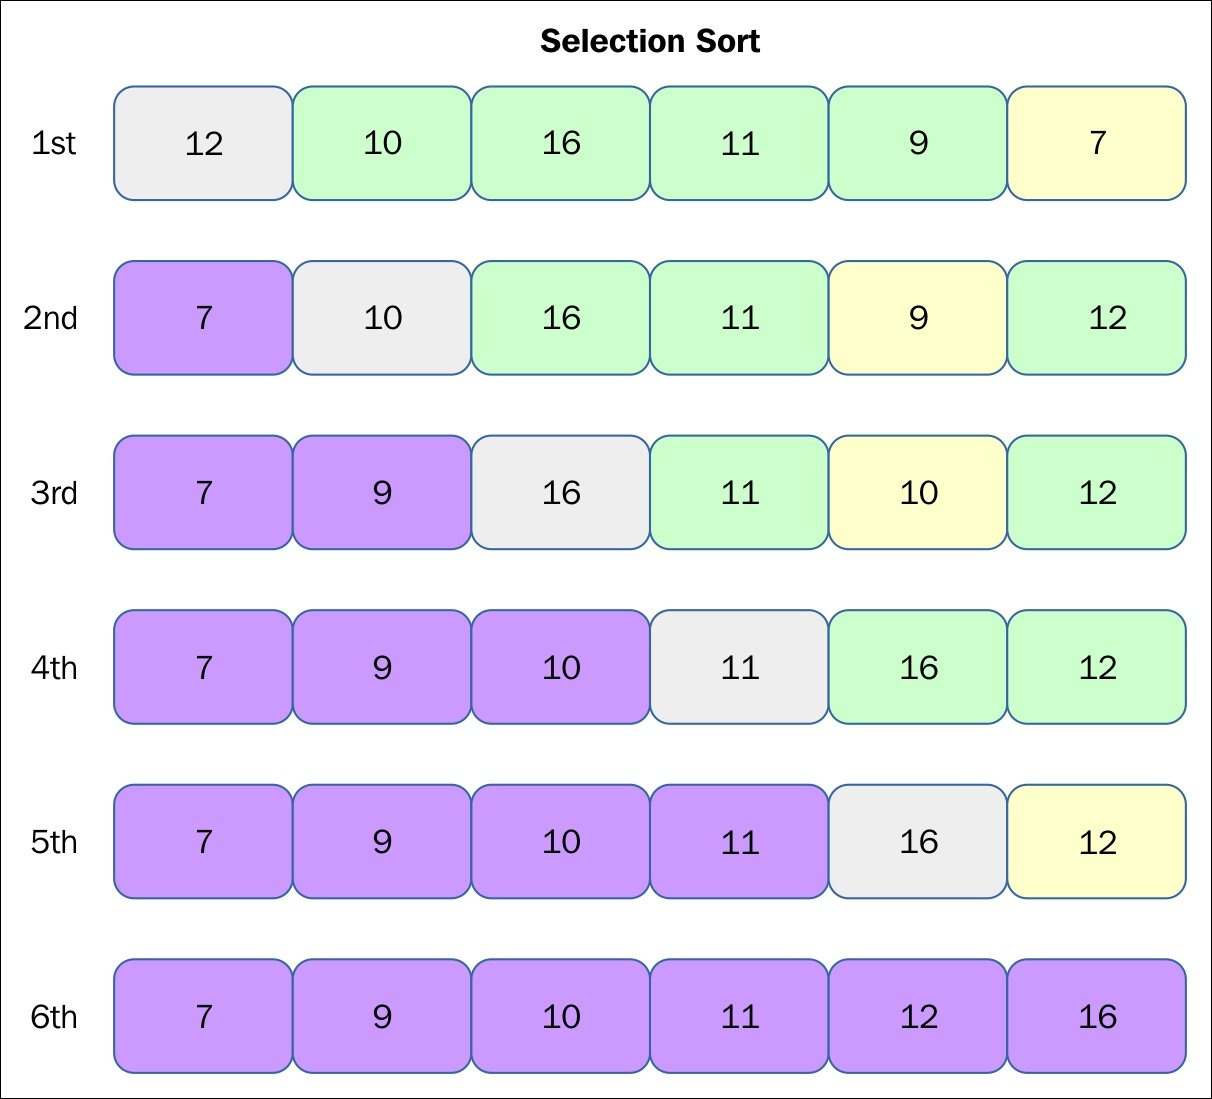

**Importante**: Repare que, de forma semelhante à conduzida no caso do *Bubble Sort*, em cada varredura é necessário avaliar um elemento a menos, uma vez que, após a primeira varredura, o menor elemento já se encontra na primeira posição e, após a segunda varredura, o segundo menor elemento já se encontra na segunda posição e assim por diante. Especificamente, o algoritmo de ordenação por seleção é dado pela seguinte função:

```python
def selection_sort(L):

    n = len(L)
    for i in range(n-1):
          posicao_do_menor = i
          for j in range(i+1,n):                
                if L[j] < L[posicao_do_menor]:
                      posicao_do_menor = j
          aux = L[posicao_do_menor]
          L[posicao_do_menor] = L[i]
          L[i] = aux


    return L
```

Na sequência, vamos analisar profundamente o funcionamento deste método.

In [ ]:
import colorama
from colorama import Fore

# Funções de impressão com cores e colchetes
def print_lista_com_realce_2(L, i_colchetes, i_blue = -1, i_red = -1):

  msg = [str(l) for l in L]

  if i_blue != -1:
    msg[i_blue] = Fore.BLUE + str(msg[i_blue]) + Fore.BLACK

  if i_red != -1:
    msg[i_red] = Fore.RED + str(msg[i_red]) + Fore.BLACK

  msg.insert(i_colchetes,'[')
  msg.insert(i_colchetes+2,']')

  msg = ','.join(msg).replace('[,','[').replace(',]',']')

  print(msg, end='')
  return msg

In [ ]:
def selection_sort(L):

    n = len(L)
    for i in range(n-1):

          print("\n-----------------",i+1,"ª varredura ---------------------\n")

          posicao_do_menor = i
          for j in range(i+1,n):
                if L[j] < L[posicao_do_menor]:
                      # Índice do menor valor ------
                      posicao_do_menor = j #
                      # ----------------------------
          print_lista_com_realce_2(L, i, i_blue = posicao_do_menor, i_red = i)

          # Atualização na lista ------------------
          aux = L[posicao_do_menor]
          L[posicao_do_menor] = L[i]
          L[i] = aux
          # ---------------------------------------

          print("  --->  ",end='')
          print_lista_com_realce_2(L, i, i_blue = i, i_red = posicao_do_menor)
          print()


    return L

L = [i for i in range(10,0,-1)]
print("Lista original: ", L, "\n")
Lordenada = selection_sort(L)
print("\nLista ordenada: ", Lordenada, "\n")

Lista original:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1] 


----------------- 1 ª varredura ---------------------

[10],9,8,7,6,5,4,3,2,1  --->  [1],9,8,7,6,5,4,3,2,10

----------------- 2 ª varredura ---------------------

1,[9],8,7,6,5,4,3,2,10  --->  1,[2],8,7,6,5,4,3,9,10

----------------- 3 ª varredura ---------------------

1,2,[8],7,6,5,4,3,9,10  --->  1,2,[3],7,6,5,4,8,9,10

----------------- 4 ª varredura ---------------------

1,2,3,[7],6,5,4,8,9,10  --->  1,2,3,[4],6,5,7,8,9,10

----------------- 5 ª varredura ---------------------

1,2,3,4,[6],5,7,8,9,10  --->  1,2,3,4,[5],6,7,8,9,10

----------------- 6 ª varredura ---------------------

1,2,3,4,5,[6],7,8,9,10  --->  1,2,3,4,5,[6],7,8,9,10

----------------- 7 ª varredura ---------------------

1,2,3,4,5,6,[7],8,9,10  --->  1,2,3,4,5,6,[7],8,9,10

----------------- 8 ª varredura ---------------------

1,2,3,4,5,6,7,[8],9,10  --->  1,2,3,4,5,6,7,[8],9,10

----------------- 9 ª varredura ---------------------

1,2,3,4,5,6,7,8,[9],1

In [ ]:
L = [i for i in range(1,11)]
print("Lista original: ", L, "\n")
Lordenada = selection_sort(L)
print("\nLista ordenada: ", Lordenada, "\n")

Lista original:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 


----------------- 1 ª varredura ---------------------

[1],2,3,4,5,6,7,8,9,10  --->  [1],2,3,4,5,6,7,8,9,10

----------------- 2 ª varredura ---------------------

1,[2],3,4,5,6,7,8,9,10  --->  1,[2],3,4,5,6,7,8,9,10

----------------- 3 ª varredura ---------------------

1,2,[3],4,5,6,7,8,9,10  --->  1,2,[3],4,5,6,7,8,9,10

----------------- 4 ª varredura ---------------------

1,2,3,[4],5,6,7,8,9,10  --->  1,2,3,[4],5,6,7,8,9,10

----------------- 5 ª varredura ---------------------

1,2,3,4,[5],6,7,8,9,10  --->  1,2,3,4,[5],6,7,8,9,10

----------------- 6 ª varredura ---------------------

1,2,3,4,5,[6],7,8,9,10  --->  1,2,3,4,5,[6],7,8,9,10

----------------- 7 ª varredura ---------------------

1,2,3,4,5,6,[7],8,9,10  --->  1,2,3,4,5,6,[7],8,9,10

----------------- 8 ª varredura ---------------------

1,2,3,4,5,6,7,[8],9,10  --->  1,2,3,4,5,6,7,[8],9,10

----------------- 9 ª varredura ---------------------

1,2,3,4,5,6,7,8,[9],1

## Análise da complexidade do Selection Sort

**Análise do pior caso**

Vamos considerar que o algoritmo tenha que efetuar a ordenação de uma lista tal como ```L = [10,9,8,7,6,5,4,3,2,1]```. Neste caso, o número de atribuições, em função do tamanho da lista, é dado por $T(n)$.

In [ ]:
# ------------------------------------------------------------------------------
#                          Pior Caso ~> R(n) = T(n)
# ------------------------------------------------------------------------------
def selection_sort(L):

    n = len(L) # 1 atribuição
    for i in range(n-1):

          print("\n-----------------",i+1,"ª varredura ---------------------\n")

          posicao_do_menor = i # n-1 execuções
          for j in range(i+1,n): # j in [1,2,3,...,n-3,n-2,n-1] --> i = 0
                                 # j in   [2,3,...,n-3,n-2,n-1] --> i = 1
                                 # j in     [3,...,n-3,n-2,n-1] --> i = 2
                                 #...
                                 # j in               [n-2,n-1] --> i = n-3
                                 # j in                   [n-1] --> i = n-2
                                 # j in                      [] --> i = n-1
                if L[j] < L[posicao_do_menor]:
                      # Índice do menor valor ------
                      posicao_do_menor = j #    n(n-1)/2 = (n²-n)/2
                      # ----------------------------

          # Atualização na lista ------------------
          aux = L[posicao_do_menor] # n-1
          L[posicao_do_menor] = L[i] # n-1
          L[i] = aux # n-1
          # ---------------------------------------


    return L


$$T_\text{Selection Sort}(n) = 4(n-1) + \frac{n^2-n}{2} + 1 = \frac{1}{2}n^2 +\frac{7}{2}n - 3$$
$$⇓$$
$$\mathcal{O}(\text{Selection Sort}) = \mathcal{O}(n^2).$$

<br/>

**Nota:** Lembre-se que $T_\text{Bubble Sort}(n) = 2n^2-n $ e $M_\text{Bubble Sort} = \frac{2n^2}{3}+\frac{7n}{6} +2$ para o *Bubble Sort*. Assim, pela nossa implementação, nota-se que a ordenação por seleção efetua um número ligeiramente menor de atribuições em comparação com o *Bubble Sort* no pior e médio caso. Entretanto, ambos possuem a mesma ordem de complexidade, então, para listas muito grandes ($n\to ∞$), ambos funcionariam de forma semelhante.

**Análise do melhor caso**

Vamos considerar que o algoritmo tenha que efetuar a ordenação de uma lista tal como ```L = [1,2,3,4,5,6,7,8,9,10]```. Neste caso, o número de atribuições, em função do tamanho da lista, é dado por $B(n)$.

In [ ]:
# ------------------------------------------------------------------------------
#                          Melhor Caso ~> R(n) = B(n)
# ------------------------------------------------------------------------------

def selection_sort(L):

    n = len(L) # 1
    for i in range(n-1):

          print("\n-----------------",i+1,"ª varredura ---------------------\n")

          posicao_do_menor = i # n-1
          for j in range(i+1,n): # j in [1,2,3,...,n-3,n-2,n-1] --> i = 0
                                 # j in   [2,3,...,n-3,n-2,n-1] --> i = 1
                                 # j in     [3,...,n-3,n-2,n-1] --> i = 2
                                 #...
                                 # j in               [n-2,n-1] --> i = n-3
                                 # j in                   [n-1] --> i = n-2
                                 # j in                      [] --> i = n-1
                if L[j] < L[posicao_do_menor]:
                      # Índice do menor valor ------
                      posicao_do_menor = j #    n(n-1)/2 = (n²-n)/2
                      # ----------------------------
          print_lista_com_realce_2(L, i, i_blue = posicao_do_menor, i_red = i)

          # Atualização na lista ------------------
          aux = L[posicao_do_menor] # n-1
          L[posicao_do_menor] = L[i] # n-1
          L[i] = aux # n-1
          # ---------------------------------------

          print("  --->  ",end='')
          print_lista_com_realce_2(L, i, i_blue = i, i_red = posicao_do_menor)
          print()


    return L

$$B_\text{Selection Sort}(n) = 4(n-1) + \frac{n^2-n}{2} + 1 = \frac{1}{2}n^2 +\frac{7}{2}n - 3$$
$$⇓$$
$$\mathcal{O}(\text{Selection Sort}) = \mathcal{O}(n^2).$$

<BR/>

**Caso médio**: Dessa forma, temos que o número de atribuições feitas tanto no melhor quanto no pior dos casos é o mesmo para o algoritmo *Selection Sort*. Isto é, $B_\text{Selection Sort} = T_\text{Selection Sort}$. Assim, da desigualdade $B_\text{Selection Sort} \leq M_\text{Selection Sort} \leq T_\text{Selection Sort}$, temos que $M_\text{Selection Sort} = B_\text{Selection Sort} = T_\text{Selection Sort} = \frac{1}{2}n^2 +\frac{7}{2}n - 3$. Ou seja, a complexidade do método de ordenação por seleção considerando-se o caso médio também é de ordem quadrática ($\mathcal{O}(n^2)$).

# Insertion Sort

A técnica de ordenação por inserção possui como principal inspiração a forma com a qual jogadores de baralho, principalmente de jogos derivados da Canastra Inglesa tais como Tranca ou Buraco, organizam suas mãos ao receberem uma nova carta: considerando que as cartas da mão da pessoa já se encontram ordenadas, insere-se a nova carta em seu devido lugar respeitando-se a ordem das cartas que já estavam na mão.

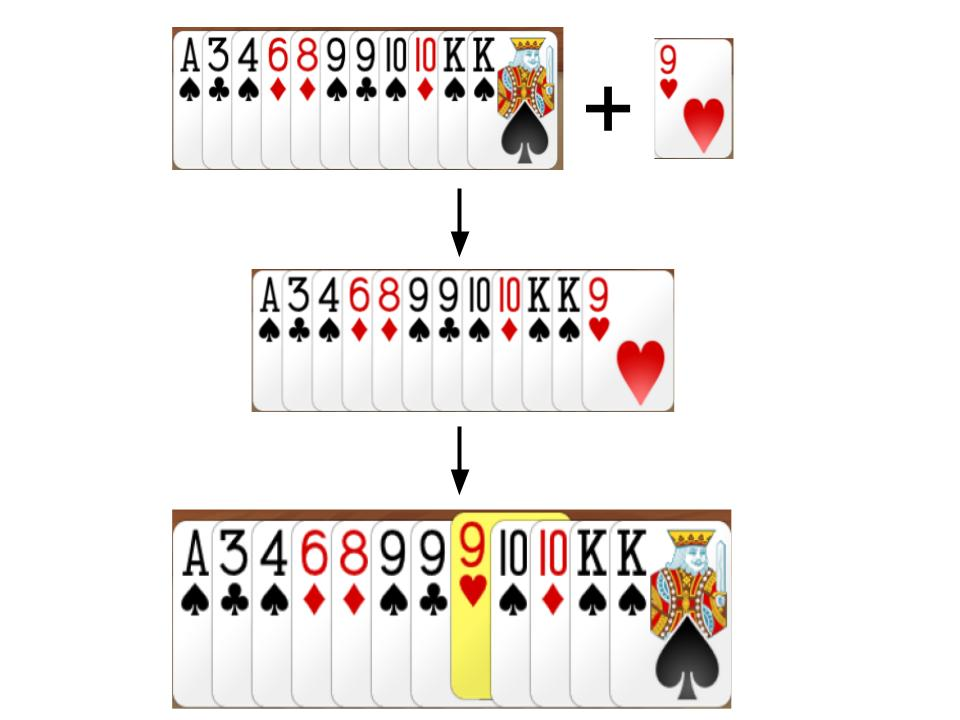

Deste modo, vamos considerar que uma dada lista de $n$ elementos seja um maço de cartas. Inicialmente, tomamos o primeiro elemento como se fosse uma carta do topo do maço. Como não há nenhum outro elemento (ou carta) para compará-lo, então ele fica na primeira posição de uma lista fictícea, que na verdade é a mesma. Na sequência, tomamos o segundo elemeno da lista e o comparamos com o elemento na lista fictícea (ou em nossa mão de cartas) para decidir qual será sua posição. Se este elemento for menor que o anterior, então o mesmo ocupará a primeira posição da lista. Caso contrário, ocupará a segunda posição. Continuaremos com este processo até que tenhamos ajustado todos os elementos da lista, ou até que as "cartas do maço" tenha sido todas apanhadas.

Por construção, teremos em nossas mãos um conjunto de cartas ordenadas e, consequentemente, a lista fictícea, na qual poderemos considerar como sendo a mesma lista de entrada, também estará ordenada.

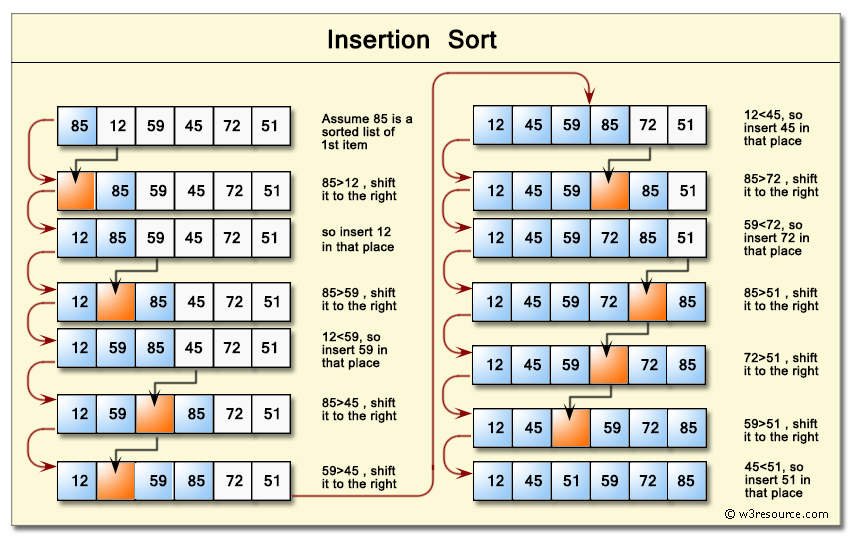



Especificamente, o algoritmo do método de ordenação por inserção é dado pela função ```insertion_sort``` a seguir:

```python
def insertion_sort(L):

  n = len(L)

  for i in range(1,n): #  Não precisa considerar o caso i = 0, pois seria a
                       # primeira carta apanhada do maço, sendo impossível
                       # realizar qualquer comparação.

        id_nova_carta = i #  Os elementos L[0],L[1],...,L[i-1] representam a mão do
                      # jogador, enquanto que L[i] é a nova carta que queremos
                      # alocar na mão já ordenada.

        while ( (id_nova_carta > 0) and (L[id_nova_carta] < L[id_nova_carta - 1]) ):

              # Efetuação de trocas ------------------------------------------------
              aux = L[id_nova_carta]
              L[id_nova_carta] = L[id_nova_carta - 1]
              L[id_nova_carta - 1] = aux
              #---------------------------------------------------------------------

              id_nova_carta -= 1 # Atualização da posição da carta na mão.

  return L
```

Na sequência, vamos analisar detalhes desta implementação e da técnica em questão.

In [ ]:
def insertion_sort(L):

  n = len(L)

  for i in range(1,n): #  Não precisa considerar o caso i = 0, pois seria a
                       # primeira carta apanhada do maço, sendo impossível
                       # realizar qualquer comparação.

        print("\n-------------", i+1, "ª carta apanhada ----------------\n")

        id_nova_carta = i #  Os elementos L[0],L[1],...,L[i-1] representam a mão do
                      # jogador, enquanto que L[i] é a nova carta que queremos
                      # alocar na mão já ordenada.

        while ( (id_nova_carta > 0) and (L[id_nova_carta] < L[id_nova_carta - 1]) ):

              print_lista_com_realce(L, i_blue = id_nova_carta-1, i_colchetes = id_nova_carta-1)

              # Efetuação de trocas ------------------------------------------------
              aux = L[id_nova_carta]
              L[id_nova_carta] = L[id_nova_carta - 1]
              L[id_nova_carta - 1] = aux
              #---------------------------------------------------------------------

              print_lista_com_realce(L, i_colchetes = id_nova_carta-1)
              print("")

              id_nova_carta -= 1 # Atualização da posição da carta na mão.

  return L

L = [i for i in range(10,0,-1)]
print("Lista original: ",L)
print("Lista ordenada:", insertion_sort(L))

Lista original:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

------------- 2 ª carta apanhada ----------------

[10,9],8,7,6,5,4,3,2,1
[9,10],8,7,6,5,4,3,2,1


------------- 3 ª carta apanhada ----------------

9,[10,8],7,6,5,4,3,2,1
9,[8,10],7,6,5,4,3,2,1

[9,8],10,7,6,5,4,3,2,1
[8,9],10,7,6,5,4,3,2,1


------------- 4 ª carta apanhada ----------------

8,9,[10,7],6,5,4,3,2,1
8,9,[7,10],6,5,4,3,2,1

8,[9,7],10,6,5,4,3,2,1
8,[7,9],10,6,5,4,3,2,1

[8,7],9,10,6,5,4,3,2,1
[7,8],9,10,6,5,4,3,2,1


------------- 5 ª carta apanhada ----------------

7,8,9,[10,6],5,4,3,2,1
7,8,9,[6,10],5,4,3,2,1

7,8,[9,6],10,5,4,3,2,1
7,8,[6,9],10,5,4,3,2,1

7,[8,6],9,10,5,4,3,2,1
7,[6,8],9,10,5,4,3,2,1

[7,6],8,9,10,5,4,3,2,1
[6,7],8,9,10,5,4,3,2,1


------------- 6 ª carta apanhada ----------------

6,7,8,9,[10,5],4,3,2,1
6,7,8,9,[5,10],4,3,2,1

6,7,8,[9,5],10,4,3,2,1
6,7,8,[5,9],10,4,3,2,1

6,7,[8,5],9,10,4,3,2,1
6,7,[5,8],9,10,4,3,2,1

6,[7,5],8,9,10,4,3,2,1
6,[5,7],8,9,10,4,3,2,1

[6,5],7,8,9,10,4,3,2,1
[5,6],7,8,

In [ ]:
L = [i for i in range(1,11)]
print("Lista original: ",L)
print("Lista ordenada:", insertion_sort(L))

Lista original:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

------------- 2 ª carta apanhada ----------------


------------- 3 ª carta apanhada ----------------


------------- 4 ª carta apanhada ----------------


------------- 5 ª carta apanhada ----------------


------------- 6 ª carta apanhada ----------------


------------- 7 ª carta apanhada ----------------


------------- 8 ª carta apanhada ----------------


------------- 9 ª carta apanhada ----------------


------------- 10 ª carta apanhada ----------------

Lista ordenada: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Análise da complexidade do Insertion Sort

**Análise do pior caso**

Vamos considerar que o algoritmo tenha que efetuar a ordenação de uma lista tal como ```L = [10,9,8,7,6,5,4,3,2,1]```. Neste caso, o número de atribuições, em função do tamanho da lista, é dado por $T(n)$.

In [ ]:
# ------------------------------------------------------------------------------
#                          Pior Caso ~> R(n) = T(n)
# ------------------------------------------------------------------------------

def insertion_sort(L):

  n = len(L) # 1 Atribuição

  for i in range(1,n): #  n-1 Execuções

        id_nova_carta = i # n-1 Execuções

        while ( (id_nova_carta > 0) and (L[id_nova_carta] < L[id_nova_carta - 1]) ):
              # i = 1   ----> id_nova_carta in [1]
              # i = 2   ----> id_nova_carta in [1,2]
              # i = 3   ----> id_nova_carta in [1,2,3]
              # ...
              # i = n-3 ----> id_nova_carta in [1,2,3,...,n-3]
              # i = n-2 ----> id_nova_carta in [1,2,3,...,n-3,n-2]
              # i = n-1 ----> id_nova_carta in [1,2,3,...,n-3,n-2,n-1]
              # Número de execuções: (n-1)n/2 = n²/2-n/2

              # Efetuação de trocas ------------------------------------------------
              aux = L[id_nova_carta] # n²/2-n/2
              L[id_nova_carta] = L[id_nova_carta - 1] # n²/2-n/2
              L[id_nova_carta - 1] = aux # n²/2-n/2
              #---------------------------------------------------------------------

              id_nova_carta -= 1 # n²/2-n/2

  return L

$$T_\text{Insertion Sort}(n) = 2n^2-2n +n-1+1 = 2n^2-n$$
$$⇓$$
$$\mathcal{O}(\text{Insertion Sort}) = \mathcal{O}(n^2).$$


**Análise do melhor caso**

Vamos considerar que o algoritmo tenha que efetuar a ordenação de uma lista tal como ```L = [1,2,3,4,5,6,7,8,9,10]```. Neste caso, o número de atribuições, em função do tamanho da lista, é dado por $B(n)$.

In [ ]:
# ------------------------------------------------------------------------------
#                          Melhor Caso ~> R(n) = B(n)
# ------------------------------------------------------------------------------

def insertion_sort(L):

  n = len(L) # 1 Atribuição

  for i in range(1,n): #  n-1 Execuções

        id_nova_carta = i # n-1 Execuções

        while ( (id_nova_carta > 0) and (L[id_nova_carta] < L[id_nova_carta - 1]) ):
              # Como a lista já se encontra ordenada, esta malha nunca será utilizada

              # Efetuação de trocas ------------------------------------------------
              aux = L[id_nova_carta]
              L[id_nova_carta] = L[id_nova_carta - 1]
              L[id_nova_carta - 1] = aux
              #---------------------------------------------------------------------

              id_nova_carta -= 1 # Atualização da posição da carta na mão.

  return L

No caso da lista já estar ordenada, repare que as atribuições internas ao laço de repetição ```while``` nunca serão executadas. Assim, considerando o melhor caso possível, o algoritmo efetuará apenas $n$ execuções. Ou seja,

$$B_\text{Insertion Sort}(n) = n,$$

e, portanto, no melhor caso, o algoritmo de ordenação por inserção tem complexidade $\mathcal{O}(n)$.

**Análise do caso médio**

Para este caso, basta adotar uma estratégia muito semelhante com a que adotamos no caso do algoritmo *Bubble Sort*. Isto é, repare que a malha ```while``` pode ser executada de $1$ a $n$ vezes, sendo estas situações equiprováveis. Sabendo que, se a malha ```while``` for executada na $k$-ésima varredura, então serão conduzidas $4k$ atribuições, considerando também que a malha foi executada nas varreduras anteriores e considerando as atribuições fora da malha, então terão sido executadas $\left(k + \sum_{i=1}^{k} 4i\right)$ atribuições. Finalmente, considerando todas as possibilidades para $k$, no caso $k \in \{1,2,...,n-1\}$, teremos uma definição para o número de atribuições para o caso médio:

$$M_\text{Insertion Sort} = \frac{1}{n-1}\sum_{k=1}^{n-1} \left(k + \sum_{i=1}^{k} 4i\right)$$

$$⇓$$

$$M_\text{Insertion Sort} = \frac{1}{n-1} \left[\sum_{k=1}^{n-1} \left(k + 4\sum_{i=1}^{k} i\right)\right]$$

$$⇓$$

$$M_\text{Insertion Sort} = \frac{1}{n-1} \left\{\sum_{k=1}^{n-1} \left[k + 4\left(\frac{k}{2}\cdot (k+1)\right)\right]\right\}$$

$$⇓$$

$$M_\text{Insertion Sort} = \frac{1}{n-1} \left\{\sum_{k=1}^{n-1} \left[k + (2k^2 + 2k)\right]\right\}$$

$$⇓$$

$$M_\text{Insertion Sort} = \frac{1}{n-1} \left[\sum_{k=1}^{n-1} \left(2k^2 + 3k\right)\right]$$

$$⇓$$

$$M_\text{Insertion Sort} = \frac{1}{n-1} \left( 2\sum_{k=1}^{n-1} k^2 + 3\sum_{k=1}^{n-1} k\right)$$

$$⇓$$

$$M_\text{Insertion Sort} = \frac{1}{n-1} \left\{ 2\left[ \frac{(n-1)[(n-1)+1][2(n-1)+1]}{6} \right] + 3\left[ \frac{n}{2}(n-1)\right]\right\}$$

$$⇓$$

$$M_\text{Insertion Sort} =  \frac{[(n-1)+1][2(n-1)+1]}{3} + 3\frac{n}{2}$$

$$⇓$$

$$M_\text{Insertion Sort} =  \frac{n[2(n-1)+1]}{3} + 3\frac{n}{2}$$

$$⇓$$

$$M_\text{Insertion Sort} =  \frac{2n^2-n}{3} + 3\frac{n}{2}$$

$$⇓$$

$$M_\text{Insertion Sort} =  \frac{2}{3}n^2 + \frac{9n-2n}{6}$$

$$⇓$$

$$M_\text{Insertion Sort} =  \frac{2}{3}n^2 + \frac{7}{6}n.$$


Logo, o desempenho do método considerando-se o caso médio é muito semelhante ao das demais técnicas abordadas, apresentando complexidade de ordem quadrática: $\mathcal{O}(n^2)$.

# **Resumo da análise de complexidade de cada método**

| Método | Ordem de complexidade no melhor caso | Ordem de complexidade no caso médio | Ordem de complexidade no pior caso
| :- | -:   |-: | -: |
| *Bubble Sort* | $\mathcal{O}(n)$   | $\mathcal{O}(n^2)$ | $\mathcal{O}(n^2)$ |
| *Selection Sort* | $\mathcal{O}(n^2)$   | $\mathcal{O}(n^2)$ | $\mathcal{O}(n^2)$ |
| *Insertion Sort* | $\mathcal{O}(n)$   | $\mathcal{O}(n^2)$ | $\mathcal{O}(n^2)$ |


Recomenda-se que sejam visualizados os vídeos com a análise comparativa visual do funcionamento das técnicas de ordenação apresentadas:

(1) https://www.youtube.com/watch?v=kPRA0W1kECg

(2) https://www.youtube.com/watch?v=ZZuD6iUe3Pc